## CHEST X-RAY PNEUMONIA

#### https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia

#### Import required libraries

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import glob
from PIL import Image

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras import layers

## TRAIN

#### Import class NORMAL images of training set

In [2]:
train_x=[]

path=r'C:\Users\ADMIN\xray\train\NORMAL\*.jpeg'

for filename in glob.glob(path): 
    im=Image.open(filename).convert('L') # convert('L') - converts RGB images (if any) to grayscale
    img = im.resize((100, 100)) 
    train_x.append(tf.keras.preprocessing.image.img_to_array(img))

#### Create train_y of size NORMAL with zeros

In [3]:
a=len(train_x)
train_y=np.zeros(a)

#### Import class PNEUMONIA images of training set

In [4]:
path=r'C:\Users\ADMIN\xray\train\PNEUMONIA\*.jpeg'

for filename in glob.glob(path): 
    im=Image.open(filename).convert('L') # convert('L') - converts RGB images (if any) to grayscale
    img = im.resize((100, 100)) 
    train_x.append(tf.keras.preprocessing.image.img_to_array(img))

#### Concatenate train_y  with ones of size PNEUMONIA

In [5]:
b=len(train_x)
trainy=np.concatenate((train_y,np.ones(b-a)))

In [6]:
trainx = np.stack(train_x) # Converts the list of arrays to a array of arrays

#### Cross verify

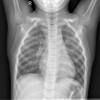

In [7]:
img = tf.keras.preprocessing.image.array_to_img(trainx[0]) 
img

## VALID

### Import class NORMAL images of validation set

In [8]:
val_x=[]

path=r'C:\Users\ADMIN\xray\val\NORMAL\*.jpeg'

for filename in glob.glob(path): 
    im=Image.open(filename).convert('L') # convert('L') - converts RGB images (if any) to grayscale
    img = im.resize((100, 100)) 
    val_x.append(tf.keras.preprocessing.image.img_to_array(img))

#### Create val_y of size NORMAL with zeros

In [9]:
a=len(val_x)
val_y=np.zeros(a)

#### Import class PNEUMONIA images of validation set

In [10]:
path=r'C:\Users\ADMIN\xray\val\PNEUMONIA\*.jpeg'

for filename in glob.glob(path): 
    im=Image.open(filename).convert('L') # convert('L') - converts RGB images (if any) to grayscale
    img = im.resize((100, 100)) 
    val_x.append(tf.keras.preprocessing.image.img_to_array(img))

#### Concatenate train_y  with ones of size PNEUMONIA

In [11]:
b=len(val_x)
valy=np.concatenate((val_y,np.ones(b-a)))

In [12]:
valx = np.stack(val_x) # Converts the list of arrays to a array of arrays

## TEST

#### Import class NORMAL images of test set

In [13]:
test_x=[]

path=r'C:\Users\ADMIN\xray\test\NORMAL\*.jpeg'

for filename in glob.glob(path): 
    im=Image.open(filename).convert('L') # convert('L') - converts RGB images (if any) to grayscale
    img = im.resize((100, 100)) 
    test_x.append(tf.keras.preprocessing.image.img_to_array(img))

#### Create test_y of size NORMAL with zeros

In [14]:
a=len(test_x)
test_y=np.zeros(a)

#### Import class PNEUMONIA images of test set

In [15]:
path=r'C:\Users\ADMIN\xray\train\PNEUMONIA\*.jpeg'

for filename in glob.glob(path): 
    im=Image.open(filename).convert('L') # convert('L') - converts RGB images (if any) to grayscale
    img = im.resize((100, 100)) 
    test_x.append(tf.keras.preprocessing.image.img_to_array(img))

#### Concatenate test_y  with ones of size PNEUMONIA

In [16]:
b=len(test_x)
testy=np.concatenate((test_y,np.ones(b-a)))

In [17]:
testx = np.stack(test_x) # Converts the list of arrays to a array of arrays

In [18]:
print('train shape : ',trainx.shape)
print('valid shape : ',valx.shape)
print('test shape : ',testx.shape)

train shape :  (5216, 100, 100, 1)
valid shape :  (16, 100, 100, 1)
test shape :  (4109, 100, 100, 1)


As the validation set is small let us use train_test_split to split data for our validation set.

In [19]:
tx,vx,ty,vy=train_test_split(trainx,trainy)

#### Train Model

In [20]:
tf.random.set_seed(1234)
es=tf.keras.callbacks.EarlyStopping(monitor='loss',patience=5) # to prevent overfitting

model=tf.keras.Sequential(
[
    layers.Conv2D(filters=60, kernel_size=(3, 3), activation='relu', padding='same'),    
    layers.MaxPooling2D(pool_size=(4, 4)),
    layers.Dropout(0.25),
            
    layers.Conv2D(40, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(8, 8)),
    layers.Dropout(0.2),  
    
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(1,activation='sigmoid')
    
])

model.compile(loss='BinaryCrossentropy',optimizer='adam',metrics=['accuracy'])
mod=model.fit(tx,ty,validation_data=(vx,vy),batch_size=300,epochs=40,callbacks=[es])

Epoch 1/40
14/14 [==============================] - 49s 3s/step - loss: 13.4766 - accuracy: 0.6056 - val_loss: 0.5786 - val_accuracy: 0.7554
Epoch 2/40
14/14 [==============================] - 47s 3s/step - loss: 0.8440 - accuracy: 0.6805 - val_loss: 0.6559 - val_accuracy: 0.7546
Epoch 3/40
14/14 [==============================] - 42s 3s/step - loss: 0.6027 - accuracy: 0.7214 - val_loss: 0.6440 - val_accuracy: 0.7615
Epoch 4/40
14/14 [==============================] - 42s 3s/step - loss: 0.5552 - accuracy: 0.7405 - val_loss: 0.6121 - val_accuracy: 0.7661
Epoch 5/40
14/14 [==============================] - 42s 3s/step - loss: 0.5252 - accuracy: 0.7520 - val_loss: 0.5715 - val_accuracy: 0.7814
Epoch 6/40
14/14 [==============================] - 42s 3s/step - loss: 0.4732 - accuracy: 0.7791 - val_loss: 0.5548 - val_accuracy: 0.7922
Epoch 7/40
14/14 [==============================] - 42s 3s/step - loss: 0.4658 - accuracy: 0.7840 - val_loss: 0.5035 - val_accuracy: 0.8129
Epoch 8/40
14/14 [=

#### Visualize

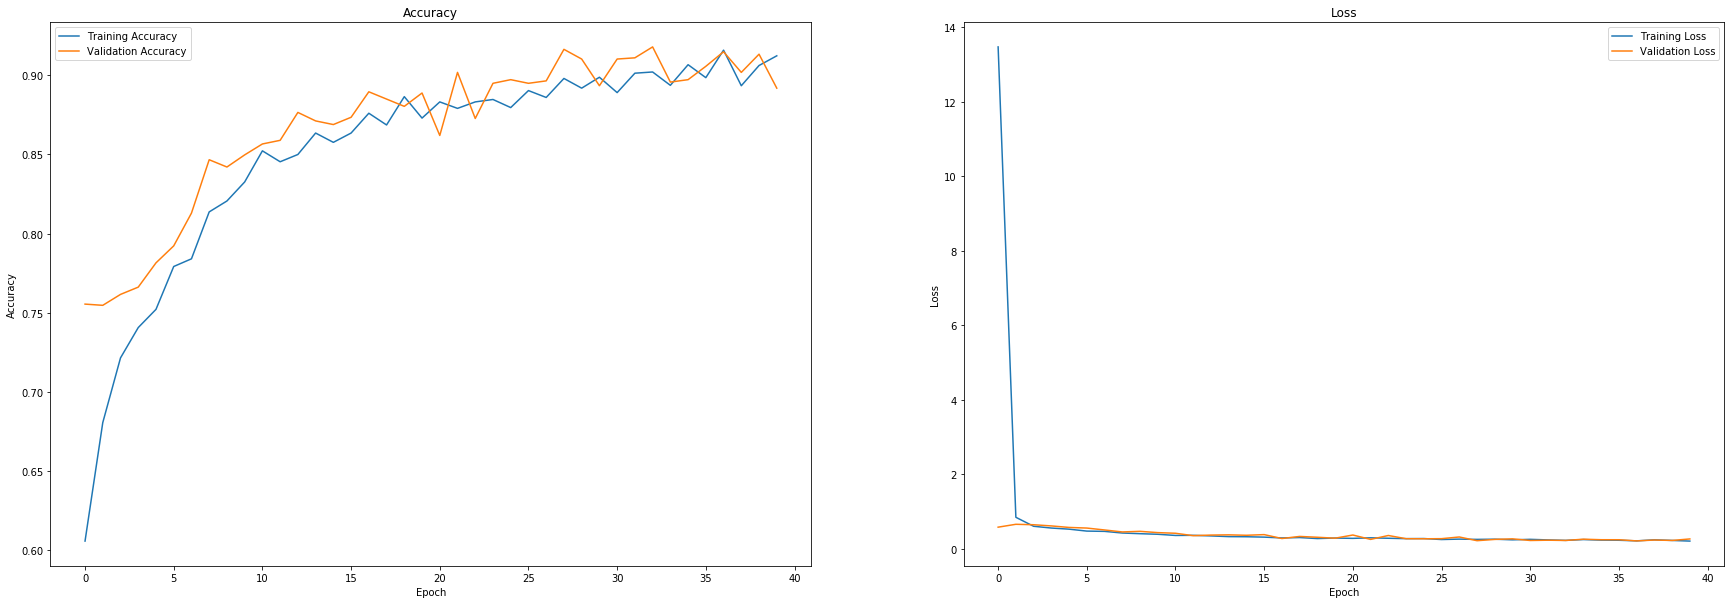

In [21]:
fig=plt.subplots(figsize=(30,10))

plt.subplot(1,2,1)
plt.plot(mod.history['accuracy'])
plt.plot(mod.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy','Validation Accuracy'])

plt.subplot(1,2,2)
plt.plot(mod.history['loss'])
plt.plot(mod.history['val_loss'])
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss','Validation Loss'])

plt.show()

#### Predict

In [22]:
pred=model.predict(testx)

#### Confusion Matrix

In [23]:
for i in range(len(pred)):
    if pred[i]>0.5:
        pred[i]=1
    else:
        pred[i]=0

tf.math.confusion_matrix(testy,pred)


<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[ 173,   61],
       [ 423, 3452]])>

TP = 3452 <br>
FP = 61 <br>
FN = 423 <br>
TN = 173 <br><br><b>
Precision = 3452 / (3452 + 61) = 0.982<br><br>
Recall = 3452 / (3452 + 423) = 0.89<br><br>
F1 score = 2 * 0.982 * 0.89 / (0.982 + 0.89) = 93.37 %<b>
    